### About this project 

#### Conducting sentimental analysis of Elon Musk's tweets and replies from 2015 until he buys Twitter.

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

query = '(from:elonmusk) until:2022-11-15 since:2020-01-01'
tweets = []
limit = 10000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets)==limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content, tweet.likeCount])

tweet

data = pd.DataFrame(tweets,columns=['Date','User','Tweet','likecount'])

df = data.copy()

df.to_csv("D:\csv files\Elonmusk.csv")

In [7]:
data = pd.read_csv("D:\csv files\Elonmusk.csv")

In [8]:
df = data.copy()

In [9]:
df = df.drop('Unnamed: 0',axis=1)

In [10]:
df

,Date,User,Tweet,likecount
0,2022-11-14 20:42:32+00:00,elonmusk,@WholeMarsBlog Good question,9954
1,2022-11-14 20:35:10+00:00,elonmusk,@cb_doge Did seem a little Dr Evil tbh haha,59944
2,2022-11-14 20:34:15+00:00,elonmusk,"@alexeheath This is an external analysis, not ...",7655
3,2022-11-14 20:32:17+00:00,elonmusk,Sìì! https://t.co/Gj1wHytJxk,42250
4,2022-11-14 18:56:24+00:00,elonmusk,@NASASpaceflight Full test duration of 14 engines,29140
...,...,...,...,...
9826,2020-01-04 03:33:58+00:00,elonmusk,@hot_rod_co @Tesla People talk about the produ...,6246
9827,2020-01-04 03:25:03+00:00,elonmusk,"@slashdot Wow, I built my first server room wi...",2194
9828,2020-01-01 06:50:06+00:00,elonmusk,Congratulations Tesla &amp; SpaceX on great 20...,146843
9829,2020-01-01 06:33:47+00:00,elonmusk,No one suspected his disguise https://t.co/yHl...,67560


In [11]:
df = df.drop(['Date', 'User', 'likecount'], axis=1)

In [12]:
df

,Tweet
0,@WholeMarsBlog Good question
1,@cb_doge Did seem a little Dr Evil tbh haha
2,"@alexeheath This is an external analysis, not ..."
3,Sìì! https://t.co/Gj1wHytJxk
4,@NASASpaceflight Full test duration of 14 engines
...,...
9826,@hot_rod_co @Tesla People talk about the produ...
9827,"@slashdot Wow, I built my first server room wi..."
9828,Congratulations Tesla &amp; SpaceX on great 20...
9829,No one suspected his disguise https://t.co/yHl...


In [13]:
def cleandata(text):
    text = re.sub(r'@[A-Za-z0-9_.]+','',text)
    text = re.sub(r'#','', text)
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','',text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [14]:
df['Tweet'] = df['Tweet'].apply(cleandata)

In [24]:
df.duplicated().value_counts()

False    7530
True     2301
dtype: int64

In [25]:
df = df.drop_duplicates()

In [26]:
df.duplicated().value_counts()

False    7530
dtype: int64

In [36]:
stemmer = PorterStemmer()
def stemming(data):
    data = [stemmer.stem(word) for word in data]
    return data

In [37]:
df = df.apply(lambda x: stemming(x))

In [38]:
df

,Tweet
0,good quest
1,did seem little dr evil tbh haha
2,this external analysis twitter it lower twitte...
3,sìì
4,full test duration 14 engin
...,...
9826,people talk products love touch heart amp brin...
9827,wow i built first server room parts frys endin...
9828,congratulations tesla amp spacex great 2019 yo...
9829,no one suspected disguis


In [39]:
def polarity(txt):
    return TextBlob(txt).sentiment.polarity

In [41]:
df['polarity'] = df['Tweet'].apply(polarity)

In [42]:
df

,Tweet,polarity
0,good quest,0.700000
1,did seem little dr evil tbh haha,-0.329167
2,this external analysis twitter it lower twitte...,0.000000
3,sìì,0.000000
4,full test duration 14 engin,0.350000
...,...,...
9826,people talk products love touch heart amp brin...,0.650000
9827,wow i built first server room parts frys endin...,0.175000
9828,congratulations tesla amp spacex great 2019 yo...,0.450000
9829,no one suspected disguis,0.000000


In [43]:
def sentimentAnalys(txt):
    if txt <0:
        return "Negative"
    elif txt == 0:
        return "Neutral"
    elif txt >0:
        return "Positive"

In [45]:
df['sentiment'] = df['polarity'].apply(sentimentAnalys)

In [46]:
df

,Tweet,polarity,sentiment
0,good quest,0.700000,Positive
1,did seem little dr evil tbh haha,-0.329167,Negative
2,this external analysis twitter it lower twitte...,0.000000,Neutral
3,sìì,0.000000,Neutral
4,full test duration 14 engin,0.350000,Positive
...,...,...,...
9826,people talk products love touch heart amp brin...,0.650000,Positive
9827,wow i built first server room parts frys endin...,0.175000,Positive
9828,congratulations tesla amp spacex great 2019 yo...,0.450000,Positive
9829,no one suspected disguis,0.000000,Neutral


<AxesSubplot:xlabel='sentiment', ylabel='count'>

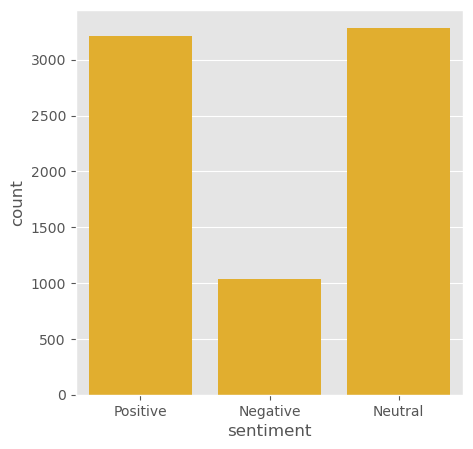

In [50]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df, color='#ffbb11')

In [51]:
df['sentiment'].value_counts()

Neutral     3283
Positive    3211
Negative    1036
Name: sentiment, dtype: int64

In [53]:
positive_tweets = df[df.sentiment == 'Positive']

In [54]:
positive_tweets

,Tweet,polarity,sentiment
0,good quest,0.700,Positive
4,full test duration 14 engin,0.350,Positive
8,how many serial requests made app refresh timelin,0.500,Positive
12,that good,0.700,Positive
16,thats bizarre part,0.400,Positive
...,...,...,...
9818,haha rock,0.200,Positive
9822,fair piece stol,0.700,Positive
9826,people talk products love touch heart amp brin...,0.650,Positive
9827,wow i built first server room parts frys endin...,0.175,Positive


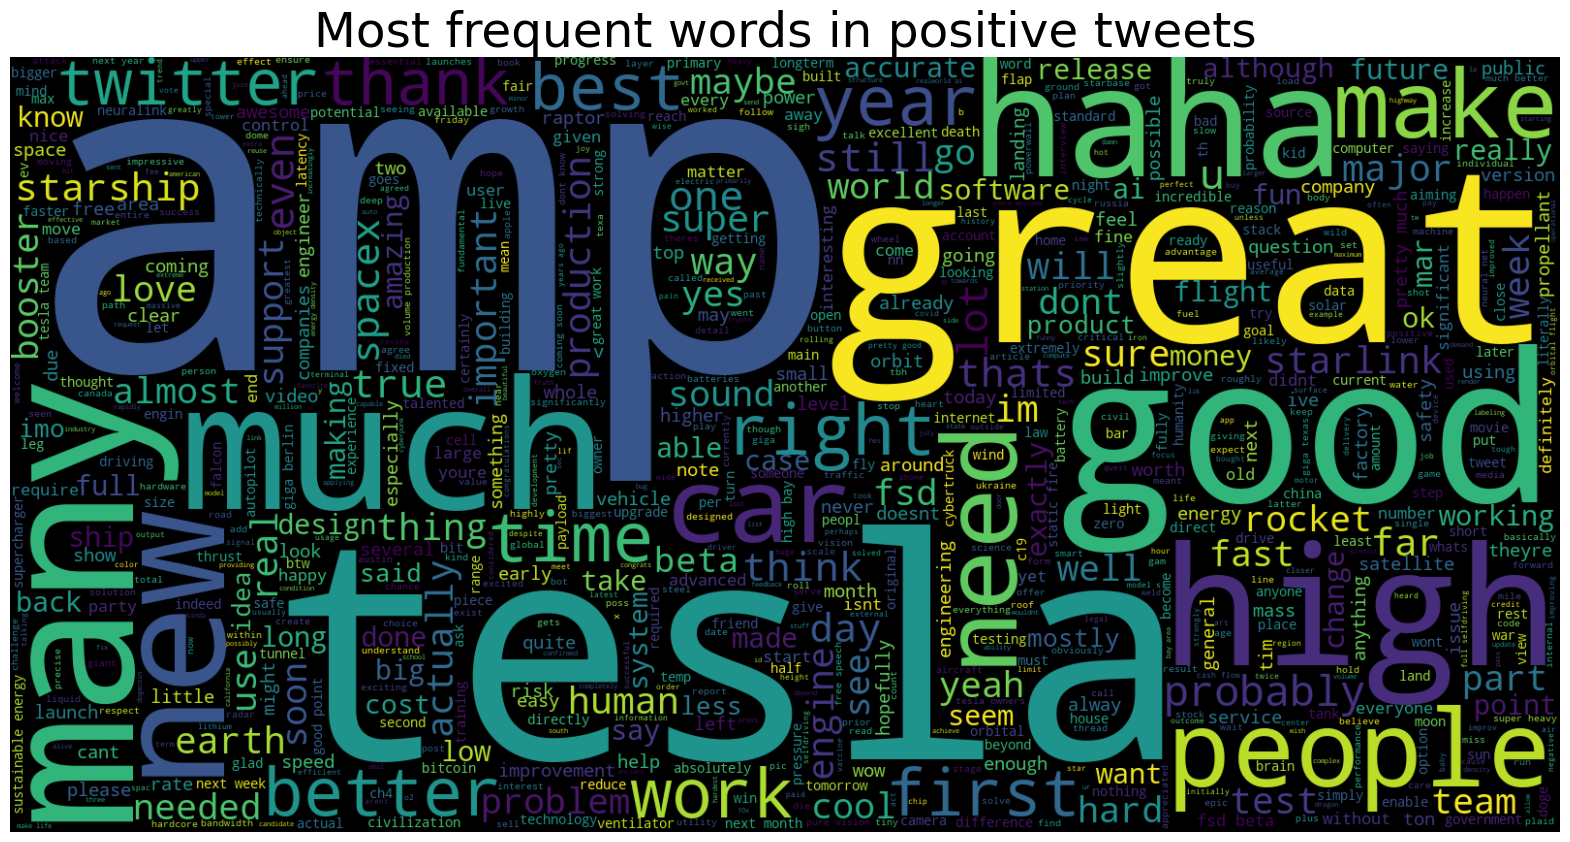

In [63]:
text = ' '.join([word for word in positive_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=800, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=35)
plt.show()

In [58]:
negative_tweets = df[df.sentiment == 'Negative']
negative_tweets

,Tweet,polarity,sentiment
1,did seem little dr evil tbh haha,-0.329167,Negative
9,and finally stop adding device tweet written w...,-0.100000,Negative
10,part today turning microservices bloatware les...,-0.083333,Negative
11,i told 1200 rpcs independently several enginee...,-0.134375,Negative
34,btc make might long wint,-0.050000,Negative
...,...,...,...
9783,hard goth,-0.291667,Negative
9785,we trapped prison font,-0.200000,Negative
9797,the sun green peak photon frequ,-0.200000,Negative
9809,looks like thin flat round ufo stick starlink ...,-0.156250,Negative


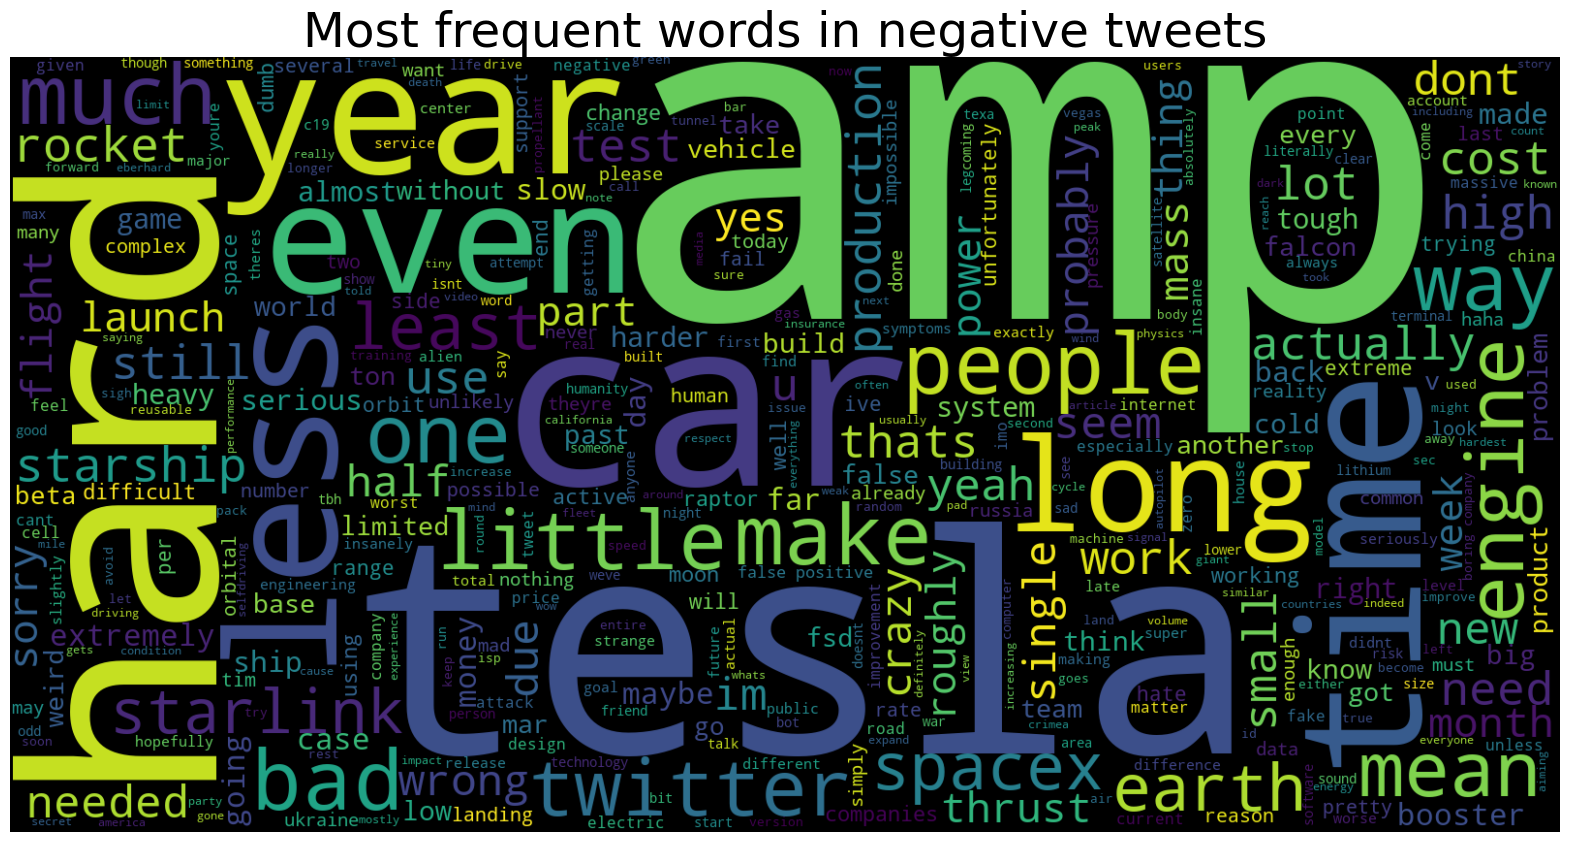

In [64]:
text = ' '.join([word for word in negative_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=400, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=35)
plt.show()

In [60]:
neutral_tweets = df[df.sentiment == 'Neutral']
neutral_tweets

,Tweet,polarity,sentiment
2,this external analysis twitter it lower twitte...,0.0,Neutral
3,sìì,0.0,Neutral
5,recent trend promis,0.0,Neutral
6,thats i said,0.0,Neutral
7,in parts world refresh takes 30 second,0.0,Neutral
...,...,...,...
9820,the nirvana baby year away turning 30,0.0,Neutral
9824,wikigeniu,0.0,Neutral
9825,zip2,0.0,Neutral
9829,no one suspected disguis,0.0,Neutral


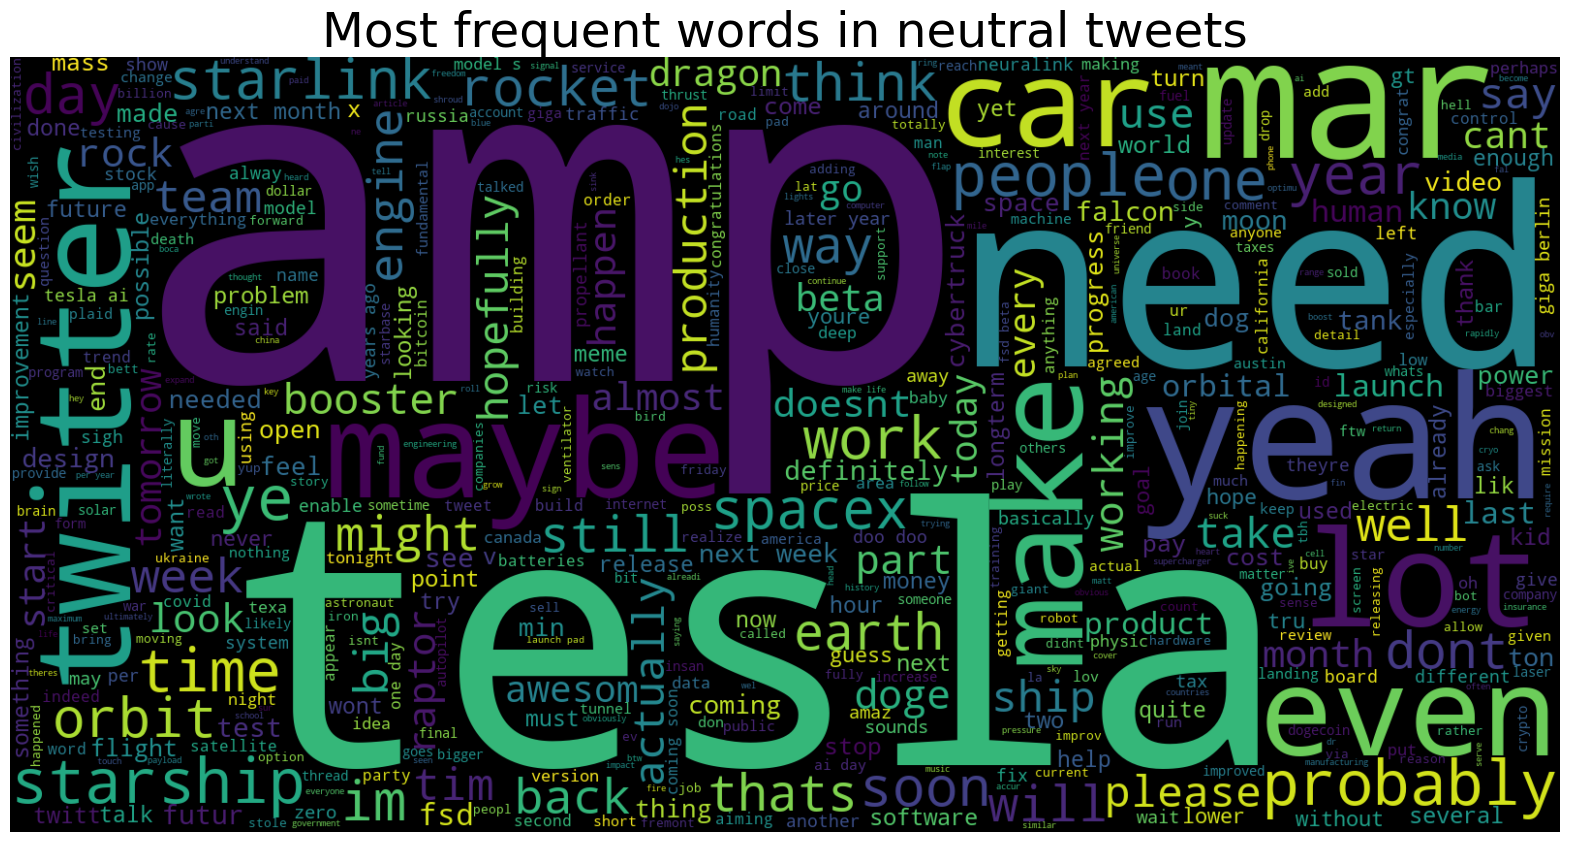

In [65]:
text = ' '.join([word for word in neutral_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=35)
plt.show()